### Title: Covid-19 data analysis Real world Project with python




* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)

* #### Github link: [Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code: [Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiM2Q4ZTc5YmUtNDg2Yi00ZDM4LWIwNjctM2YwODIyYmM2MTE0IiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

#### Introduction

* Covid is a pandemic that started in 2019, hence the name. It took lives of many people in general and countries lost their economic power in different ways, how it started came with different angles altogether. This data set contains he information about which regions were affected, the deaths, confirmed who had it and how many managed to recover over a specified period.





* The data is a csv file and analysis is done using pandas 
* matplotlib will be used for some data visualisations to get the inisghts of the data

#### Questions to answer

These Questions will be answered under phase3: of the data analysis


* Which regions had high death cause of covid
* Which region produced good recoveries
* Which day when most people were confirmed to have the virus 
* Show the number of death, confirmed and recovered in each regions
* Take out the information when the recoveries were less than 30
* which regions confirmed the minimum number of deaths
* how many cases were recorded from Zimbabwe 


These questions have been developed by the arthor to help analyse the data and tell the story about the data

# Phase 1: Data Preparation

This step involves data import,it includes import of libraries that facilitate data import, analysis and visualisation.

In [16]:
import pandas as pd               #for data loading and manipulation

import numpy as np                #for stastical analysis

import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns

import matplotlib
%matplotlib inline 

In [17]:
na_vals = [' ', 'nan', 'Nan', '?', 'missing', 'Missing']      #the list containing all the values that are to be deemed as null values

df = pd.read_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\4. covid_19_data.csv")

#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath
#take note, on both cases insert r before the path directory.

#The method of inputting r doesnt matter
#import the dataset into the jupyter notebook folder you working on and copy the name of the dataset hence insert it in the parentheses

In [18]:
#view first rows of the dataset
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [19]:
#shape of the dataset
df.shape

(321, 6)

The dataset has 321 rows and 6 columns

In [20]:
df.columns.to_frame()

,0
Date,Date
State,State
Region,Region
Confirmed,Confirmed
Deaths,Deaths
Recovered,Recovered


In [21]:
#check the total non null values in the dataset
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

There is one column [state] that has so many missing values, the case shall be dealt with on phase 2 of data cleaning

# Phase 2: Data Processing

This phase includes all the cleaning, transforming and processing of data

#### Step 1: Check for all the the missing or na values in the dataset

In [22]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

dropping the na values will damage the dataset, for this case since state is only on affected 
the choice might be to drop the column or just leave it like that since it regions are given
The author decided to leave the column with in the dataframe

#### Step 2: Check for all the data duplicates and remove them

In [23]:
df.duplicated().sum()

0

There is no duplication of data

#### Step 2: Check for the datatypes in the dataset to see if there is need to change the datatypes of some columns

In [24]:
df.dtypes   #checks the datatype of the dataset

Date         object
State        object
Region       object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

change the date datatype from object to datettime

In [25]:
df['Date'] = pd.to_datetime(df['Date'])  #converts the date datatype into datetime

In [26]:
#check for the dtypes again
df.dtypes

Date         datetime64[ns]
State                object
Region               object
Confirmed             int64
Deaths                int64
Recovered             int64
dtype: object

The Date has been converted to the Datetime datatype

#### Step 2.1: Create a columns containing day names, month and year in the dataset

In [27]:
#creates the new columns in the dataset
df['Day_Name'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [28]:
#view te first rows of the data
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered,Day_Name,Month,Year
0,2020-04-29,NaN,Afghanistan,1939,60,252,Wednesday,4,2020
1,2020-04-29,NaN,Albania,766,30,455,Wednesday,4,2020
2,2020-04-29,NaN,Algeria,3848,444,1702,Wednesday,4,2020
3,2020-04-29,NaN,Andorra,743,42,423,Wednesday,4,2020
4,2020-04-29,NaN,Angola,27,2,7,Wednesday,4,2020


New columns have been added, however the month has to be converted to from number to strings by renaming

### Step 2.2: Create a columns containing day names, month and year in the dataset

In [29]:
df['Month'] = df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                  11:'Nov', 12:'Dec'})

In [30]:
#view the dataset
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered,Day_Name,Month,Year
0,2020-04-29,NaN,Afghanistan,1939,60,252,Wednesday,Apr,2020
1,2020-04-29,NaN,Albania,766,30,455,Wednesday,Apr,2020
2,2020-04-29,NaN,Algeria,3848,444,1702,Wednesday,Apr,2020
3,2020-04-29,NaN,Andorra,743,42,423,Wednesday,Apr,2020
4,2020-04-29,NaN,Angola,27,2,7,Wednesday,Apr,2020


# Phase 3: Data Analysis

* EDA is an approach to anaylse data inorder to summarize main characteristics of the data
* It also helps to gain better understanding of the dataset
* helps uncover relationships between different variables 
* extract the important variables for the problem being solved

#### Q1:Which regions had high death cause of covid

In [31]:
df.head(1)

,Date,State,Region,Confirmed,Deaths,Recovered,Day_Name,Month,Year
0,2020-04-29,NaN,Afghanistan,1939,60,252,Wednesday,Apr,2020


In [32]:
#region is grouped by the deaths that occured in that region in that total, starting from the top
df.groupby('Region').Deaths.sum().sort_values(ascending=False).head()

Region
US        60967
Italy     27682
UK        26166
Spain     24275
France    24121
Name: Deaths, dtype: int64

USA had the highest hit

#### Q2:Which region produced good recoveries

In [37]:
#region is grouped by the recoveries that occured in that region in that total, starting from the top

df.groupby('Region').Recovered.sum().sort_values(ascending=False).head()

Region
Spain             132929
US                120720
Germany           120400
Mainland China     77610
Iran               73791
Name: Recovered, dtype: int64

Spain had more recoveries

#### Q3:Which day when most people were confirmed to have the virus 

In [38]:
df.groupby('Day_Name').Confirmed.sum().sort_values(ascending=False).head()

Day_Name
Wednesday    3193886
Name: Confirmed, dtype: int64

the data was collected mostly for wednsdays

In [39]:
df.head(1)

,Date,State,Region,Confirmed,Deaths,Recovered,Day_Name,Month,Year
0,2020-04-29,NaN,Afghanistan,1939,60,252,Wednesday,Apr,2020


#### Q4:Show the number of death, confirmed and recovered in each regions

In [40]:
#deaths, recoveries and confirmed is grouped by the region


df.groupby('Region')[['Deaths', 'Recovered', 'Confirmed']].max()

,Deaths,Recovered,Confirmed
Region,,,
Afghanistan,60,252,1939
Albania,30,455,766
Algeria,444,1702,3848
Andorra,42,423,743
Angola,2,7,27
...,...,...,...
West Bank and Gaza,2,71,344
Western Sahara,0,5,6
Yemen,0,1,6


#### Q5:Take out the information when the recoveries were less than 30

In [41]:
filt = (df['Recovered'] < 30)   #filters the dataset by less than 30
df[filt].head()

,Date,State,Region,Confirmed,Deaths,Recovered,Day_Name,Month,Year
4,2020-04-29,NaN,Angola,27,2,7,Wednesday,Apr,2020
5,2020-04-29,NaN,Antigua and Barbuda,24,3,11,Wednesday,Apr,2020
10,2020-04-29,NaN,Bahamas,80,11,23,Wednesday,Apr,2020
16,2020-04-29,NaN,Belize,18,2,9,Wednesday,Apr,2020
18,2020-04-29,NaN,Bhutan,7,0,5,Wednesday,Apr,2020


#### Q6:which regions confirmed the minimum number of deaths

In [42]:
#gives out the min deaths per region
df.groupby('Region')['Deaths'].min().sort_values(ascending=True).head()

Region
Laos                0
Rwanda              0
Papua New Guinea    0
Cambodia            0
Canada              0
Name: Deaths, dtype: int64

some regions had zero cases

#### Q7:how many cases were recorded from Zimbabwe 

In [24]:
filt = (df['Region']  == 'Zimbabwe')
df[filt][['Deaths', 'Recovered', 'Confirmed']]

,Deaths,Recovered,Confirmed
180,4,5,32


# Phase 4: Data Visualisation

* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.

### 4.1: Top 5 region with highest deaths

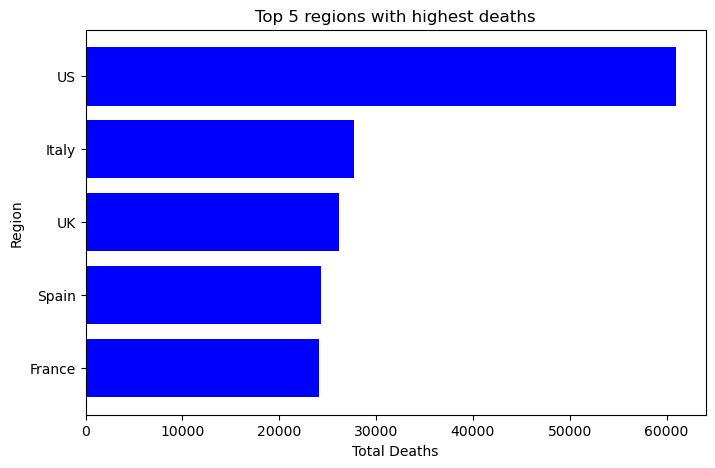

In [43]:



# Group by region and sum deaths, then sort in descending order and take top 5
top_regions = df.groupby('Region').Deaths.sum().sort_values(ascending=False).head()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top_regions.index, top_regions.values, color='blue')

# Set chart title and axis labels
ax.set_title('Top 5 regions with highest deaths')
ax.set_xlabel('Total Deaths')
ax.set_ylabel('Region')

# Invert y-axis to show highest value on top
ax.invert_yaxis()

plt.show()


##### * **key takeaway:** USA had highest deaths and France had the least deaths in the top 5 countriesm

### 4.2: Top 5 regions with highest recoveries

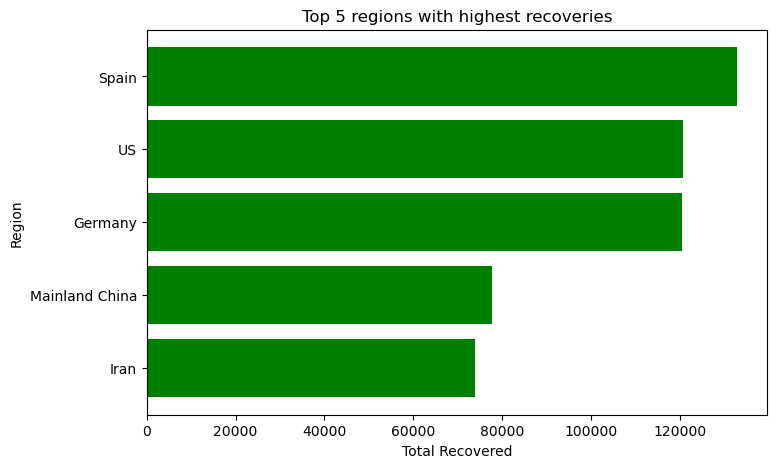

In [45]:


# Group by region and sum recovered cases, then sort in descending order and take top 5
top_regions = df.groupby('Region').Recovered.sum().sort_values(ascending=False).head()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top_regions.index, top_regions.values, color='green')

# Set chart title and axis labels
ax.set_title('Top 5 regions with highest recoveries')
ax.set_xlabel('Total Recovered')
ax.set_ylabel('Region')

# Invert y-axis to show highest value on top
ax.invert_yaxis()

plt.show()


##### * **key takeaway:** Spain had more recoveries and iran had the least in the top 5 least

### 4.3: Zimbabwe covid-19 Cases

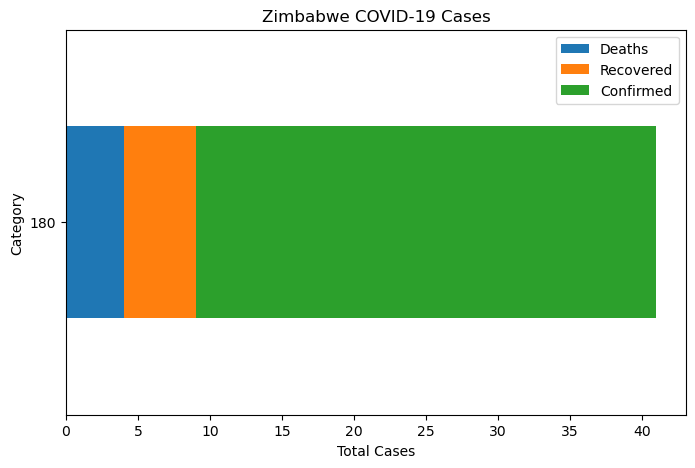

In [46]:

# Filter data for Zimbabwe
filt = (df['Region'] == 'Zimbabwe')
zimbabwe_data = df[filt][['Deaths', 'Recovered', 'Confirmed']]

# Create a stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
zimbabwe_data.plot(kind='barh', stacked=True, ax=ax)

# Set chart title and axis labels
ax.set_title('Zimbabwe COVID-19 Cases')
ax.set_xlabel('Total Cases')
ax.set_ylabel('Category')

plt.show()


##### * **key takeaway:** Zimbabwe head more confirmed cases which resulted in less deaths  and more recoveries

In [47]:
#saving the dataset for more vizualisation
df.to_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\cleaned covid 19")

#### Further data Visualization was done in powerbi: [Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiM2Q4ZTc5YmUtNDg2Yi00ZDM4LWIwNjctM2YwODIyYmM2MTE0IiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

## Author: TamiriraIshe Nyevera

## Date: 15 January 2023

* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)

* #### Github link: [Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiM2Q4ZTc5YmUtNDg2Yi00ZDM4LWIwNjctM2YwODIyYmM2MTE0IiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)